<a href="https://colab.research.google.com/github/SimantaKarki/Python/blob/master/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# AI_lab:5 ANNs
# tensorflow-version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#load data
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

train_images.shape


(60000, 28, 28)

In [ ]:
#lets have a look at one of the images
train_images[0,23,23]
train_labels[:10]
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


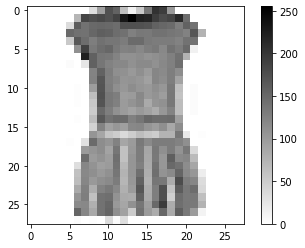

In [ ]:
plt.figure()
plt.imshow(train_images[3],cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#data preprocessing
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
#Build Model
#falttening is the process of changing multidimensional array to one dimension
model = keras.Sequential([
keras.layers.Flatten(input_shape = (28,28)),
keras.layers.Dense(128,activation = 'relu'), #relu cahnges negative value to zero and positive as it is for the eqn wx + b
keras.layers.Dense(10,activation = 'softmax')  #softmax gives probability distribution
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
#train the model
model.fit(train_images, train_labels,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.5012 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3776 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3356 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3136 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2809 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2698 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2572 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2491 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [ ]:
#evaulate the model 
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose = 1) # assignment overfitting minimize
print('Test accuracy',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3475 - accuracy: 0.8768
Test accuracy 0.876800000667572


In [ ]:
#making predictions
predictions = model.predict(test_images)
predictions[2]
print(predictions[2])
print(np.argmax(predictions[2]))
print(class_name[np.argmax(predictions[2])])

[1.9848301e-08 1.0000000e+00 1.6048092e-12 2.4859177e-09 2.5512398e-10
 1.4925164e-14 4.1237520e-11 9.9941558e-18 3.1653851e-12 1.1712823e-17]
1
Trouser


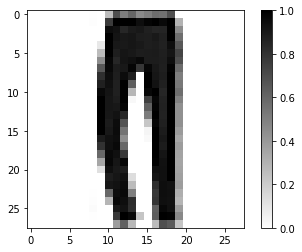

In [ ]:
plt.figure()
plt.imshow(test_images[2],cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()